<a href="https://colab.research.google.com/github/rodrigolopezlopez/AnalisisCOVIDCDMX/blob/main/ProyectoFinal_MD_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto Final**

### Análisis de personas contagiadas por COVID-19 en la CDMX durante el tercer bimestre de 2021 (1 de Mayo de 2021 a 1 de Julio de 2021) para menores de 18 años

Nombre: Lopez Lopez Rodrigo

No. Cuenta: 315080995

Email: rodrigo24689@hotmail.com

### **Librerías necesarias**

In [ ]:
import pandas as pd # Biblioteca para manipulación del dataset como dataframe
import numpy as np # Bibloteca para manipulaciones matemáticas del dataframe
import matplotlib.pyplot as plt # Biblioteca para desplegar la informacion en forma de gráfico
import seaborn as sns # Biblioteca con un mayor número de gráficos
%matplotlib inline 

In [ ]:
# Instrucciones necesarias para mejorar la visualización de los datos
pd.set_option('display.max_columns', None) # Poder desplegar todas las columnas del dataset
pd.set_option('display.max_rows', 100) # Poder desplegar hasta 100 registros para mejorar la visualización

### **Caso de estudio**

El propósito de este análisis es encontrar factores de riesgo entre las personas contagiadas por COVID-19 en la CDMX que desafortunamente fallecieron, agrupar en K grupos a los contagiados de acuerdo a sus características médicamente relevantes. 

Fuente: https://datos.cdmx.gob.mx/dataset/base-covid-sinave

**Objetivo:**
Determinar las características médicas que posee el grupo de contagiados donde existieron mas defunciones. Posteriormente, clasificar dichas características como factores de riesgo. 

### **I. Acceso a datos**

In [ ]:
from google.colab import drive # Montamos google drive para acceder a nuestro data set
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Cargamos nuestro dataset desde nuestro drive
contagiadosGeneral = pd.read_csv('/content/gdrive/MyDrive/DataSets/sisver_public.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (79,80,85,87,88,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
contagiadosGeneral.head()

,id,origen,sector,cveentuni,entidad,delega,unidad,fechreg,sexo,entresi,cventine,mpioresi,cvemuni,locresi,cvelocal,tipacien,evoluci,fecdef,semdef,intubado,digcline,edad,naciona,estaemba,mesesemb,esindige,hableind,ocupacio,seringre,fecingre,fecinisi,diagprob,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,otracon,enfcardi,obesidad,insrencr,tabaquis,rectrata,txcrobia,txantivi,antivira,fecinitxantivi,conocaso,contaves,concerdo,conanima,vacunado,fecvaest,tommue,labora,follabor,resdefin,esmigra,paisnal,paisori,fingmex,puerperio,diaspuerp,antipireticos,uci,linaje,viaje1,viaje2,viaje3,viaje4,viaje5,antigencovid,fecha_actualizacion
0,0,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III TULYEHUALCO,2021-02-03 00:00:00,FEMENINO,CIUDAD DE MEXICO,9,XOCHIMILCO,13.0,XOCHIMILCO,1.0,AMBULATORIO,SEGUIMIENTO DOMICILIARIO,NaN,NaN,NaN,NO,54,MEXICANA,NO,NaN,NO,NO,HOGAR,CONSULTA EXTERNA,2021-01-12 00:00:00,2021-01-10 00:00:00,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),NO,NO,SI,NO,SI,NO,NO,SI,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,SI,NO,NO,NO,NaN,NaN,SI,NO,NO,PERRO,NO,NaN,NO,NaN,0.0,NEGATIVO,NaN,NaN,NaN,NaN,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,2021-07-01 18:00:11
1,1,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UMF 43 ROJO GOMEZ,2021-01-21 00:00:00,MASCULINO,CIUDAD DE MEXICO,9,IZTAPALAPA,7.0,IZTAPALAPA,1.0,AMBULATORIO,SEGUIMIENTO TERMINADO,NaN,NaN,NaN,NO,34,MEXICANA,NO,0.0,NO,NO,EMPLEADOS,CONSULTA EXTERNA,2021-01-11 00:00:00,2021-01-02 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),SI,SI,SI,NO,NO,NO,NO,NO,SI,SI,SI,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,SI,OSELTAMIVIR,NaN,NO,NO,NO,NaN,NO,NaN,NO,NaN,0.0,SARS-CoV-2,NaN,México,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVO,2021-07-01 18:00:11
2,2,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UMF 19 COYOACAN,2021-01-23 00:00:00,FEMENINO,CIUDAD DE MEXICO,9,COYOACAN,3.0,COYOACAN,1.0,AMBULATORIO,SEGUIMIENTO TERMINADO,NaN,NaN,NaN,NO,53,MEXICANA,NO,0.0,NO,NO,HOGAR,CONSULTA EXTERNA,2021-01-08 00:00:00,2021-01-05 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),NO,NO,SI,NO,NO,NO,NO,NO,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NaN,NaN,NO,NO,NO,NaN,SI,2020-10-20 00:00:00,NO,NaN,0.0,NEGATIVO,NaN,México,NaN,NaN,NaN,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,2021-07-01 18:00:11
3,3,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HPSIQ MF 10 POSTAL,2021-01-28 00:00:00,FEMENINO,CIUDAD DE MEXICO,9,IZTACALCO,6.0,IZTACALCO,1.0,AMBULATORIO,SEGUIMIENTO TERMINADO,NaN,NaN,NaN,NO,72,MEXICANA,NO,0.0,NO,NO,EMPLEADOS,CONSULTA EXTERNA,2021-01-28 00:00:00,2021-01-25 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),NO,NO,SI,NO,NO,NO,SI,NO,SI,SI,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NaN,NaN,SI,NO,NO,NaN,NO,NaN,NO,NaN,0.0,SARS-CoV-2,NaN,México,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVO,2021-07-01 18:00:11
4,4,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. FRANCISCO J. BALMIS,2021-03-23 00:00:00,MASCULINO,CIUDAD DE MEXICO,9,IZTAPALAPA,7.0,IZTAPALAPA,1.0,AMBULATORIO,SEGUIMIENTO TERMINADO,NaN,NaN,NaN,NO,64,MEXICANA,NaN,NaN,NO,NO,OTROS,CONSULTA EXTERNA,2021-03-22 00:00:00,2021-03-20 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NaN,NaN,NO,NO,NO,KCH,NO,NaN,NO,NaN,0.0,NEGATIVO,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,2021-07-01 18:00:11


In [ ]:
# Número Total de registros y columnas
contagiadosGeneral.shape

(2990511, 93)

### **II. Limpieza de datos y selección de características**

Primero seleccionaremos los registros que cumplan con las fechas establecidas para este análisis. Solo analizaremos los registros de las personas contagiadas del tercer bimestre del 2021. (01 de mayo del 2021 a 01 de julio del 2021) y que sean menores de 18 años

In [ ]:
# Seleccionamos solo los registros que cumplan con la fecha requerida por el análisis y la edad necesaria
contagiados = contagiadosGeneral[(contagiadosGeneral['fechreg'] >= '2021-05-01 00:00:00') & (contagiadosGeneral['fechreg'] < '2021-07-01 00:00:00') & (contagiadosGeneral['edad'] < 18)]

In [ ]:
# Observamos la cantidad de registros restantes con las fechas y edad solicitadas
contagiados.shape

(25388, 93)

In [ ]:
# Agrupamos por sexo y conocemos el total de cada grupo
print(contagiados.groupby('sexo').size())

sexo
FEMENINO     12616
MASCULINO    12772
dtype: int64


In [ ]:
# Seleccionamos las características relevantes
caracteristicas = ['sexo', 'tipacien', 'intubado', 'digcline', 'estaemba', 'fiebre', 'tos', 'odinogia', 'disnea', 'irritabi', 'diarrea', 'dotoraci', 'calofrios', 'cefalea', 'mialgias', 'artral', 'ataedoge', 'rinorrea', 'polipnea', 'vomito', 'dolabdo', 'conjun', 'cianosis', 'inisubis', 'diabetes', 'epoc', 'asma', 'inmusupr', 'hiperten', 'vih_sida', 'enfcardi', 'obesidad', 'insrencr', 'tabaquis', 'vacunado', 'tommue']
contagiadosCaracteristicas = contagiados[caracteristicas]

In [ ]:
# Los valores faltantes se colocara un cero en el registro
contagiadosCaracteristicas = contagiadosCaracteristicas.replace(np.nan, 0)

In [ ]:
# Remplazamos los valores cadena por valores numérico para aplicar el algoritmo requerido
# MASCULINO = 1 -- FEMENINO = 0
contagiadosCaracteristicas['sexo'].replace(['FEMENINO', 'MASCULINO'],[0, 1], inplace=True)
# HOSPITALIZADO = 1 -- AMBULATORIO = 0
contagiadosCaracteristicas['tipacien'].replace(['AMBULATORIO', 'HOSPITALIZADO'],[0, 1], inplace=True)
# Los valores "SE INGORA", se colocara un 0 en el registro
contagiadosCaracteristicas.replace('SE IGNORA', 0, inplace=True)

In [ ]:
# Reemplazamos en todas las columnas de la siguiente manera: 
# SI = 1, afirmativo a la columna
# NO = 0, negativo a la columna
contagiadosCaracteristicas.replace(['NO', 'SI'],[0, 1], inplace=True)

In [ ]:
# Muestra de datos finales
contagiadosCaracteristicas.head()

,sexo,tipacien,intubado,digcline,estaemba,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,enfcardi,obesidad,insrencr,tabaquis,vacunado,tommue
101,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
653,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
926,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Graficos para conocer la relación entre las variables y conocer el data set

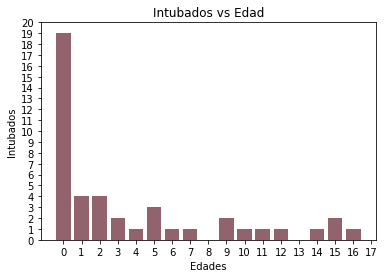

In [ ]:
# Variables a graficar
edades = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16]
intubados = []

# Encontrar el # de intubados del data set 
for i in edades:
  numeroIntubados = int(contagiadosCaracteristicas[(contagiadosCaracteristicas['intubado'] == 1) & (contagiados['edad'] == i)].groupby(['intubado'])['intubado'].count())
  intubados.append(numeroIntubados)
  
# Grafico de barras
plt.bar(edades, intubados, color = (0.572, 0.388, 0.423))

# Divisiones en gráfico
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# Etiquetas
plt.title('Intubados vs Edad')
plt.xlabel('Edades')
plt.ylabel('Intubados')

# Mostrar gráfico
plt.show()

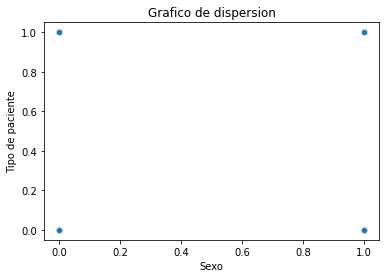

In [ ]:
sns.scatterplot(x = 'sexo', y = 'tipacien', data = contagiadosCaracteristicas)
plt.title('Grafico de dispersion')
plt.xlabel('Sexo')
plt.ylabel('Tipo de paciente')
plt.show()

In [ ]:
# Generamos nuestra matriz para el algoritmo
MContagiados = np.array(contagiadosCaracteristicas)
pd.DataFrame(MContagiados)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25383,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25384,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25385,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **III. Algoritmo K-means**

In [ ]:
# Importamos las bibliotecas necesarias para el algoritmo K-means
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

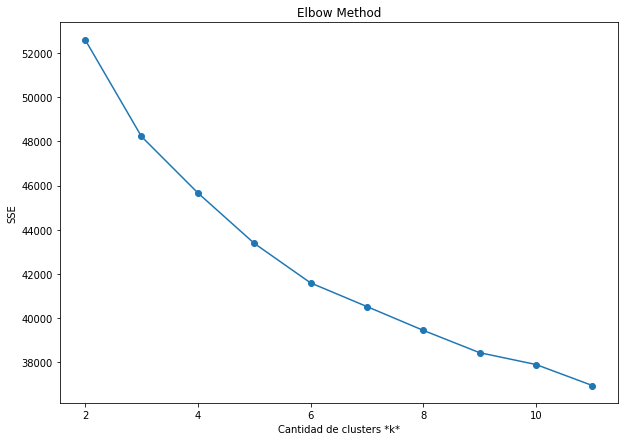

In [ ]:
# Graficamos el método del codo, para obervar el número apropiado de grupos
SSE = []
for i in range(2, 12):
  km = KMeans(n_clusters = i, random_state = 0)
  km.fit(MContagiados)
  SSE.append(km.inertia_)

# Desplegamos el gráfico
plt.figure(figsize=(10, 7))
plt.plot(range(2, 12), SSE, marker = 'o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
# Analizamos el número óptimo de grupos
from kneed import KneeLocator
kl = KneeLocator(range(2, 12), SSE, curve = 'convex', direction = 'decreasing')
kl.elbow

6

#### **Algoritmo K-means**

In [ ]:
# Generamos nuestro modelos de clustering particional
MParticional = KMeans(n_clusters = 6, random_state= 0).fit(MContagiados)
MParticional.predict(MContagiados)
MParticional.labels_

array([5, 0, 1, ..., 4, 1, 5], dtype=int32)

In [ ]:
# Agregamos la etiqueta del grupo asignado a cada registro a nuestro data set de partida
contagiadosCaracteristicas['clusterP'] = MParticional.labels_
contagiadosCaracteristicas.head()

,sexo,tipacien,intubado,digcline,estaemba,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,enfcardi,obesidad,insrencr,tabaquis,vacunado,tommue,clusterP
101,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5
342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
653,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
926,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Agrupamos para conocer el tamaño de cada grupo
contagiadosCaracteristicas.groupby(['clusterP'])['clusterP'].count()

clusterP
0    6225
1    6406
2    3621
3    2117
4    3419
5    3600
Name: clusterP, dtype: int64

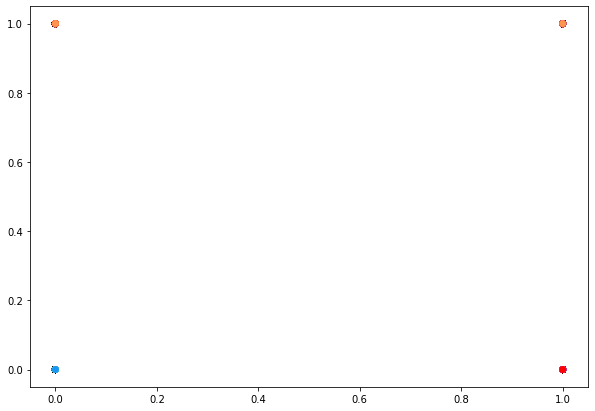

In [ ]:
# Graficamos la distribucion de nuestros datos
plt.figure(figsize=(10, 7))
plt.scatter(MContagiados[:,0], MContagiados[:,1], c = MParticional.labels_, cmap = 'rainbow')
plt.show()

In [ ]:
# Encontramos los centroides de cada grupo para analizar las características inherentes 
CentroidesP = MParticional.cluster_centers_
pd.DataFrame(CentroidesP.round(6), columns = caracteristicas)

,sexo,tipacien,intubado,digcline,estaemba,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,enfcardi,obesidad,insrencr,tabaquis,vacunado,tommue
0,1.000000,0.024257,0.000964,0.003052,0.000000,0.017671,0.060241,0.040321,0.018635,0.025060,0.035020,0.012691,0.015422,0.058153,0.017510,0.009799,0.026827,0.037590,0.007390,0.022972,0.025221,0.012691,0.002892,0.026345,0.002088,0.000321,0.018153,0.001767,0.001285,0.000321,0.001928,0.013494,0.000803,0.009157,0.150522,-0.000000
1,-0.000000,0.024664,0.000781,0.001873,0.029504,0.013269,0.052451,0.048236,0.018576,0.025913,0.034499,0.015610,0.015610,0.086638,0.022167,0.009678,0.024977,0.033562,0.008430,0.023728,0.026850,0.010615,0.002185,0.020762,0.003122,0.000624,0.014674,0.000937,0.002342,0.000312,0.002342,0.009835,0.000937,0.003590,0.158914,-0.000000
2,0.502900,0.014085,-0.000000,0.004695,0.001657,0.178128,0.792599,0.553162,0.066004,0.086716,0.064071,0.059100,0.093068,0.507871,0.071527,0.023750,0.114609,0.797846,0.024579,0.033140,0.047777,0.082022,0.005247,0.133941,0.003866,0.000552,0.032588,0.003314,0.001933,0.000276,0.002762,0.022370,0.000829,0.009942,0.202154,0.147749
3,0.491261,0.030704,0.001417,0.015116,0.000945,0.568729,0.592348,0.634388,0.148795,0.173359,0.243269,0.201228,0.446859,0.765706,0.945205,0.754369,0.374587,0.469532,0.068966,0.121398,0.189891,0.163439,0.014643,0.291450,0.010864,-0.000000,0.039206,0.004251,0.007558,0.001889,0.004724,0.033066,0.002362,0.013699,0.143599,0.263581
4,0.527640,0.163498,0.003510,0.008482,0.006727,0.032173,0.097104,0.063176,0.064054,0.046505,0.033928,0.023691,0.023399,0.140099,0.030418,0.018134,0.077508,0.059667,0.024861,0.028663,0.031588,0.014917,0.012869,0.052939,0.002632,0.000292,0.017257,0.025154,0.005850,0.000585,0.016672,0.009944,0.009944,0.005557,0.101492,1.000000
5,0.522778,0.129444,0.005000,0.020833,0.001667,0.983333,0.435833,0.171944,0.101389,0.222222,0.249722,0.075000,0.141944,0.387500,0.046111,0.019722,0.212222,0.178611,0.052778,0.199167,0.174167,0.058611,0.018611,0.288611,0.002500,0.001944,0.022500,0.015833,0.005278,0.001111,0.008889,0.019722,0.004444,0.001944,0.155556,0.266667


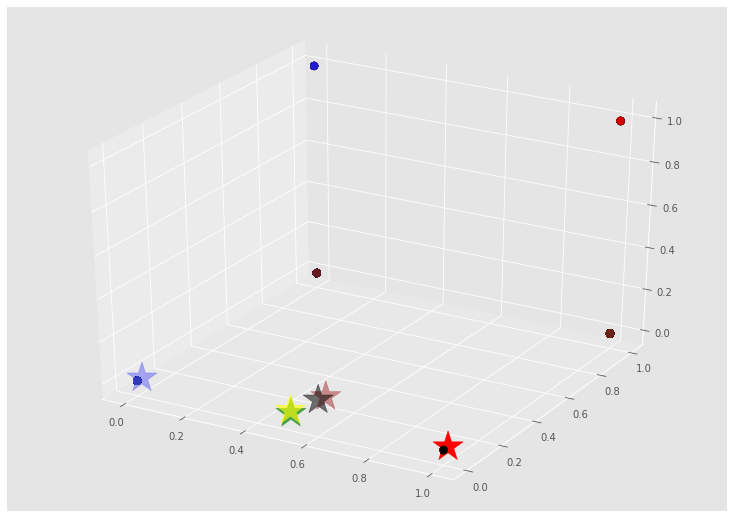

In [ ]:
# Graficamos la distribución de nuestros datos asignados a cada grupo con su perteneciente centroide
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']  = (10, 7)
plt.style.use('ggplot')
colores = ['red', 'blue', 'green', 'yellow', 'brown', 'black']
asignar = []
for row in MParticional.labels_:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MContagiados[:, 0], MContagiados[:, 1], MContagiados[:, 2], marker = 'o', c = asignar, s = 60)
ax.scatter(CentroidesP[:, 0], CentroidesP[:, 1], CentroidesP[:, 2], marker = '*', c = colores, s = 1000)
plt.show()

### **IV. Análisis de resultados**

In [ ]:
# Agregamos la etiqueta del grupo seleccionado a nuestro data set
contagiados['clusterP'] = MParticional.labels_
contagiados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,origen,sector,cveentuni,entidad,delega,unidad,fechreg,sexo,entresi,cventine,mpioresi,cvemuni,locresi,cvelocal,tipacien,evoluci,fecdef,semdef,intubado,digcline,edad,naciona,estaemba,mesesemb,esindige,hableind,ocupacio,seringre,fecingre,fecinisi,diagprob,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,otracon,enfcardi,obesidad,insrencr,tabaquis,rectrata,txcrobia,txantivi,antivira,fecinitxantivi,conocaso,contaves,concerdo,conanima,vacunado,fecvaest,tommue,labora,follabor,resdefin,esmigra,paisnal,paisori,fingmex,puerperio,diaspuerp,antipireticos,uci,linaje,viaje1,viaje2,viaje3,viaje4,viaje5,antigencovid,fecha_actualizacion,clusterP
101,101,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-II PRADERA,2021-06-23 00:00:00,FEMENINO,CIUDAD DE MEXICO,9,GUSTAVO A. MADERO,5.0,ARAGON,230.0,AMBULATORIO,EN TRATAMIENTO,NaN,NaN,NaN,NO,7,MEXICANA,NO,NaN,NO,NO,ESTUDIANTES,OBSERVACION DE URGENCIAS,2021-06-23 00:00:00,2021-06-22 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NO,NO,NO,PERRO,SI,2020-12-05 00:00:00,NO,NaN,0.0,SARS-CoV-2,NaN,NaN,NaN,NaN,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVO,2021-07-01 18:00:11,5
342,342,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-II SANTA CATARINA YECAHUIZOTL,2021-06-23 00:00:00,MASCULINO,CIUDAD DE MEXICO,9,TLAHUAC,11.0,SANTA CATARINA YECAHUITZOTL,26.0,AMBULATORIO,SEGUIMIENTO TERMINADO,NaN,NaN,NaN,NO,15,MEXICANA,NaN,NaN,NO,NO,ESTUDIANTES,CONSULTA EXTERNA,2021-06-21 00:00:00,2021-06-21 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NO,NO,NO,NO,NO,NaN,NO,NaN,0.0,NEGATIVO,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,2021-07-01 18:00:11,0
653,653,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HOSPITAL PEDIATRICO PERALVILLO,2021-06-24 00:00:00,FEMENINO,MEXICO,15,TLALNEPANTLA DE BAZ,104.0,TLALNEPANTLA,1.0,HOSPITALIZADO,CASO NO GRAVE,NaN,NaN,NO,NO,2,MEXICANA,NO,NaN,NO,NO,OTROS,URGENCIAS PEDIATRIA,2021-06-23 00:00:00,2021-06-23 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NO,NO,NO,NaN,NO,NaN,NO,NaN,0.0,NEGATIVO,NaN,NaN,NaN,NaN,NO,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,2021-07-01 18:00:11,1
926,926,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.C. MIXQUIC,2021-05-12 00:00:00,FEMENINO,CIUDAD DE MEXICO,9,TLAHUAC,11.0,SAN ANDRES MIXQUIC,11.0,AMBULATORIO,SEGUIMIENTO TERMINADO,NaN,NaN,NaN,NO,1,MEXICANA,NO,NaN,NO,NO,HOGAR,CONSULTA EXTERNA,2021-05-12 00:00:00,2021-05-11 00:00:00,ENFERMEDAD TIPO INFLUENZA (ETI),SI,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NO,NO,NO,PERRO,NO,NaN,NO,NaN,0.0,NEGATIVO,NaN,NaN,NaN,NaN,NO,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,2021-07-01 18:00:11,5
1001,1001,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.C. MIXQUIC,2021-06-21 00:00:00,MASCULINO,CIUDAD DE MEXICO,9,TLAHUAC,11.0,TLAHUAC,1.0,AMBULATORIO,SEGUIMIENTO TERMINADO,NaN,NaN,NaN,NO,6,MEXICANA,NaN,NaN,NO,NO,ESTUDIANTES,CONSULTA EXTERNA,2021-06-18 00:00:00,2021-06-18 00:00:00,INFECCION RESPIRATORIA AGUDA GRAVE (IRAG),NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NaN,NO,NO,NO,N,NO,NaN,NO,NaN,0.0,NEGATIVO,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVO,2021-07-01 18:00:11,0


In [ ]:
# Desplegamos las posibles investigaciones que podemos hacer de los grupos
print(contagiados.groupby('evoluci').size())

evoluci
ALTA - CURACION                 2
ALTA - MEJORIA                763
ALTA - TRASLADO                33
ALTA - VOLUNTARIA               4
CASO GRAVE -                  106
CASO GRAVE - TRASLADO           1
CASO NO GRAVE                 524
DEFUNCION                      18
EN TRATAMIENTO               5240
REFERENCIA                      6
SEGUIMIENTO DOMICILIARIO     4567
SEGUIMIENTO TERMINADO       14124
dtype: int64


In [ ]:
# Analizamos el número de defunciones que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'DEFUNCION')].groupby(['clusterP'])['clusterP'].count()

clusterP
0    1
1    3
2    1
3    3
4    4
5    6
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de casos graves que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'CASO GRAVE -')].groupby(['clusterP'])['clusterP'].count()

clusterP
0     7
1    10
2     2
3     9
4    28
5    50
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de alta curacion que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'ALTA - CURACION')].groupby(['clusterP'])['clusterP'].count()

clusterP
2    1
5    1
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de alta mejoria que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'ALTA - MEJORIA')].groupby(['clusterP'])['clusterP'].count()

clusterP
0     57
1     67
2     36
3     35
4    347
5    221
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de alta traslado que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'ALTA - TRASLADO')].groupby(['clusterP'])['clusterP'].count()

clusterP
0     8
1    12
4     1
5    12
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de alta voluntaria que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'ALTA - VOLUNTARIA')].groupby(['clusterP'])['clusterP'].count()

clusterP
5    4
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de caso grave traslado que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'CASO GRAVE - TRASLADO')].groupby(['clusterP'])['clusterP'].count()

clusterP
5    1
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de caso no grave que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'CASO NO GRAVE')].groupby(['clusterP'])['clusterP'].count()

clusterP
0     77
1     68
2     11
3     18
4    179
5    171
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de en tratamiendo que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'EN TRATAMIENTO')].groupby(['clusterP'])['clusterP'].count()

clusterP
0    1231
1    1267
2     758
3     565
4     603
5     816
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de referencia que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'REFERENCIA')].groupby(['clusterP'])['clusterP'].count()

clusterP
1    2
2    1
3    2
5    1
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de seguimiento domiciliario que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'SEGUIMIENTO DOMICILIARIO')].groupby(['clusterP'])['clusterP'].count()

clusterP
0    1060
1    1137
2     679
3     371
4     752
5     568
Name: clusterP, dtype: int64

In [ ]:
# Analizamos el número de seguimiento terminado que hubieron por cada grupo
contagiados[(contagiados['evoluci'] == 'SEGUIMIENTO TERMINADO')].groupby(['clusterP'])['clusterP'].count()

clusterP
0    3784
1    3840
2    2132
3    1114
4    1505
5    1749
Name: clusterP, dtype: int64

In [ ]:
# Analizamos los sectores donde se presentaron los contagios 
print(contagiados.groupby('sector').size())

sector
CRUZ ROJA        1
ESTATAL          3
IMSS          2860
ISSSTE         102
PEMEX           41
PRIVADA       1123
SEDENA          51
SEMAR           47
SSA          21160
dtype: int64


In [ ]:
# Analizamos por grupo el número contagiados en el sector IMSS
contagiados[(contagiados['sector'] == 'IMSS')].groupby(['clusterP'])['clusterP'].count()

clusterP
0    127
1    124
2    983
3    763
4    122
5    741
Name: clusterP, dtype: int64

In [ ]:
# Analizamos por grupo el número contagiados en el sector ISSSTE
contagiados[(contagiados['sector'] == 'ISSSTE')].groupby(['clusterP'])['clusterP'].count()

clusterP
0     5
1     6
2    14
3    20
4    12
5    45
Name: clusterP, dtype: int64

In [ ]:
# Analizamos por grupo el número contagiados en el sector SSA
contagiados[(contagiados['sector'] == 'SSA')].groupby(['clusterP'])['clusterP'].count()

clusterP
0    5733
1    5907
2    2470
3    1196
4    3128
5    2726
Name: clusterP, dtype: int64

In [ ]:
# Analizamos por grupo el número contagiados en el sector PRIVADA
contagiados[(contagiados['sector'] == 'PRIVADA')].groupby(['clusterP'])['clusterP'].count()

clusterP
0    356
1    365
2    130
3     93
4    125
5     54
Name: clusterP, dtype: int64

In [ ]:
# Analizamos la edad promedio de los registros por grupo
contagiados.groupby(['clusterP'])['edad'].mean()

clusterP
0    11.658635
1    12.003590
2    11.145540
3    12.496930
4    10.614800
5     8.920278
Name: edad, dtype: float64

### **V. Conclusiones**

Podemos observar que el algoritmo de K-means nos devolvio 6 grupos, donde cada grupo tiene características médicas diferentes que servirán para tomar decisiones despues de la evaluación de un profesional de la materia. Si la información es relevante el profesional puede tomar acción basandose en esta información, ya que puede ser tomada como referencia de áreas de oportunidad. 

1. Analizaremos el grupo 01 como ejemplo de este plan de acción. 

GRUPO 0: 

Cantidad de registros: 6225

Número de defunciones: 1

Número de casos graves: 7

Edad promedio: 11.65

Características relevantes: Podemos observar que el grupo se encuentra unicamente conformado por hombres, la mayoría de ellos fueron pacientes ambulatorios. Analizando el apartado de síntomas, encontramos que los síntomas fueron prácticamente nulos, al igual que las comorbilidades presentes en los pacientes. En general, los pacientes se encuentran en un estado general de salud satisfactorio.

2. Analizando al grupo con mayor número de defunciones

GRUPO 5: 

Número de defunciones: 6

Número de casos graves: 50

Edad promedio: 8.92

Características relevantes: Podemos observar que el grupo se encuentra conformado de manera equitativa entre hombres y mujeres, la mayoría de ellos fueron pacientes ambulatorios. Analizando el apartado de síntomas, encontramos que los síntomas fueron notarios principalmente se presentaron con fiebre, mientras en las conmorbilidades no se encontraron con índices altos. En general, los pacientes se encuentran en un estado general de salud satisfactorio, pero los síntomas fueron mas severos que en los demas grupos.

Un facto a destacar de este grupo es el promedio de edad, ya que podemos observar que es el grupo con la menor edad, lo que puede ser un indicador de alerta para un profesional de la salud o para el sistema de salud de la ciudad de méxico. Dando como testimonio que los niños de edades aproximadas entre 8 - 9 años de edad, corren un riesgo significativamente mayor. 